Read in the all_hour geo JSON file about Earthquakes. You may do the rest using native JSON commands or make it into a Pandas DF. Then, answer these prompts: 1.) Use a loop or recursion to print out only the Magnitudes 2.) Select and Print the observation with the highest magnitude and its associated location 3.) Make a histogram of the frequencies of earthquakes in each city. Did any have more than one?

In [2]:
import json
f = open('all_hour.geojson')
data = json.load(f)

In [3]:
data

{'type': 'FeatureCollection',
 'metadata': {'generated': 1570553658000,
  'url': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_hour.geojson',
  'title': 'USGS All Earthquakes, Past Hour',
  'status': 200,
  'api': '1.8.1',
  'count': 14},
 'features': [{'type': 'Feature',
   'properties': {'mag': 0.59,
    'place': '10km WNW of The Geysers, CA',
    'time': 1570553385240,
    'updated': 1570553480214,
    'tz': -480,
    'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/nc73288815',
    'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/nc73288815.geojson',
    'felt': None,
    'cdi': None,
    'mmi': None,
    'alert': None,
    'status': 'automatic',
    'tsunami': 0,
    'sig': 5,
    'net': 'nc',
    'code': '73288815',
    'ids': ',nc73288815,',
    'sources': ',nc,',
    'types': ',geoserve,nearby-cities,origin,phase-data,',
    'nst': 15,
    'dmin': 0.002426,
    'rms': 0.02,
    'gap': 67,
    'magType': 'md',
    'type': 'earthquake'

In [4]:
type(data)

dict

In [5]:
data.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

In [9]:
data['features']

[{'type': 'Feature',
  'properties': {'mag': 0.59,
   'place': '10km WNW of The Geysers, CA',
   'time': 1570553385240,
   'updated': 1570553480214,
   'tz': -480,
   'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/nc73288815',
   'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/nc73288815.geojson',
   'felt': None,
   'cdi': None,
   'mmi': None,
   'alert': None,
   'status': 'automatic',
   'tsunami': 0,
   'sig': 5,
   'net': 'nc',
   'code': '73288815',
   'ids': ',nc73288815,',
   'sources': ',nc,',
   'types': ',geoserve,nearby-cities,origin,phase-data,',
   'nst': 15,
   'dmin': 0.002426,
   'rms': 0.02,
   'gap': 67,
   'magType': 'md',
   'type': 'earthquake',
   'title': 'M 0.6 - 10km WNW of The Geysers, CA'},
  'geometry': {'type': 'Point',
   'coordinates': [-122.8574982, 38.8251648, 2.39]},
  'id': 'nc73288815'},
 {'type': 'Feature',
  'properties': {'mag': 1.3,
   'place': '17km SSW of Big Lake, Alaska',
   'time': 1570553311729,
   'updated'

In [11]:
type(data['features'])

list

In [27]:
import pandas as pd
df = pd.DataFrame(data['features'])
df

,geometry,id,properties,type
0,"{'type': 'Point', 'coordinates': [-122.8574982...",nc73288815,"{'mag': 0.59, 'place': '10km WNW of The Geyser...",Feature
1,"{'type': 'Point', 'coordinates': [-150.0748, 6...",ak019cwztt9g,"{'mag': 1.3, 'place': '17km SSW of Big Lake, A...",Feature
2,"{'type': 'Point', 'coordinates': [-141.0749, 6...",ak019cwztm0i,"{'mag': 1.4, 'place': '76km E of Cape Yakataga...",Feature
3,"{'type': 'Point', 'coordinates': [-122.8570023...",nc73288810,"{'mag': 1.79, 'place': '10km WNW of The Geyser...",Feature
4,"{'type': 'Point', 'coordinates': [-116.9763333...",ci39119680,"{'mag': 1.92, 'place': '22km N of Barstow, CA'...",Feature
5,"{'type': 'Point', 'coordinates': [-117.4501667...",ci39119664,"{'mag': 0.85, 'place': '3km NNE of Fontana, CA...",Feature
6,"{'type': 'Point', 'coordinates': [-122.7350006...",nc73288805,"{'mag': 0.15, 'place': '2km NE of The Geysers,...",Feature
7,"{'type': 'Point', 'coordinates': [-117.7175, 3...",ci39119624,"{'mag': 0.47, 'place': '17km E of Little Lake,...",Feature
8,"{'type': 'Point', 'coordinates': [-146.5677, 6...",ak019cwzof5n,"{'mag': 1.9, 'place': '17km SW of Valdez, Alas...",Feature
9,"{'type': 'Point', 'coordinates': [-123.2383347...",nc73288790,"{'mag': 1.51, 'place': '16km NE of Brooktrails...",Feature


Task 1

In [34]:
for x in data['features']:
    print(x['properties']['mag'])

0.59
1.3
1.4
1.79
1.92
0.85
0.15
0.47
1.9
1.51
2
1.6
2.1
1.7


Task 2

In [74]:
import re
maglist = []
location = []
place = []
for x in data['features']:
    maglist.append(x['properties']['mag'])
    location.append(x['geometry']['coordinates'])
    place.append((re.sub(r'.*f', '', x['properties']['place']))[1:])

indexofmax = maglist.index(max(maglist))
print(max(maglist))
print(location[indexofmax])
print(place[indexofmax])

2.1
[-151.1405, 62.0821, 34.4]
Talkeetna, Alaska


Counter({'The Geysers, CA': 3, 'Big Lake, Alaska': 1, 'Cape Yakataga, Alaska': 1, 'Barstow, CA': 1, 'Fontana, CA': 1, 'Little Lake, CA': 1, 'Valdez, Alaska': 1, 'Brooktrails, CA': 1, 'Bear Creek, Alaska': 1, 'Cantwell, Alaska': 1, 'Talkeetna, Alaska': 1, 'Arctic Village, Alaska': 1})


(array([11.,  0.,  0.,  0.,  1.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. ]),
 <a list of 5 Patch objects>)

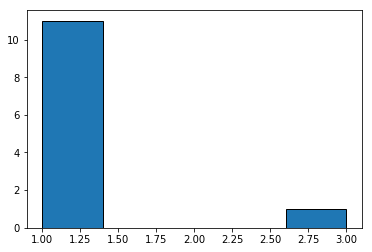

In [90]:
from collections import Counter

placescount = Counter(place)

import matplotlib.pyplot as plt
print(placescount)
plt.hist(placescount.values(), bins=5, edgecolor='black')

Yes, the Geysers, CA had 3 earthquakes.